In [1]:
import cv2
from cvzone.HandTrackingModule import HandDetector

In [2]:
import numpy as np
import math
import time

In [28]:
detector = HandDetector(detectionCon=0.8, maxHands=1)
offcet=25
imagesize=300
folder="data/C"
count=0

In [29]:
vid = cv2.VideoCapture(0)
while True:   
    ret, img = vid.read()
    hands, img = detector.findHands(img)
    if hands:
        hand=hands[0]
        x,y,w,h=hand["bbox"]
        try:
            whiteimg=np.ones((imagesize,imagesize,3),np.uint8)*255
            imageCrop=img[y-offcet:y+h+offcet,x-offcet:x+w+offcet]
            aspectratio=h/w;
#             whiteimg[0:imageCrop.shape[0],0:imageCrop.shape[1]]=imageCrop
#             cv2.imshow('whiteimg2', whiteimg)
            if aspectratio>1:
                k=imagesize/h
                wCal=math.ceil(k*w)
                resizeImg=cv2.resize(imageCrop,(wCal,imagesize))
                resizeshape=resizeImg.shape;
                wGap=math.ceil((imagesize-wCal)/2)
                whiteimg[:,wGap:wGap+wCal]=resizeImg
#                 cv2.imshow('whiteImage', whiteimg)
            else:
                k=imagesize/w
                hCal=math.ceil(k*h)
                resizeImg=cv2.resize(imageCrop,(imagesize,hCal))
                resizeshape=resizeImg.shape;
                hGap=math.ceil((imagesize-hCal)/2)
                whiteimg[hGap:hGap+hCal,:]=resizeImg
#                 cv2.imshow('whiteImage', whiteimg)

            
        except:
            print("error occured")
        cv2.imshow('whiteImage', whiteimg)
    cv2.imshow('frame', img)
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
#     if key == ord('s'):
#         cv2.imwrite(f'{folder}/image_{time.time()}.jpg',whiteimg)
#         print("image saved")
#         count+=1
#         print(count)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
#     if cv2.waitKey(1) & 0xFF == ord('s'):
#         cv2.imwrite(f'{folder}/image_{time.time()}.jpg',whiteimg)
#         print("image saved")
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [3]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
model=load_model('hand_gesture_train_model.h5')

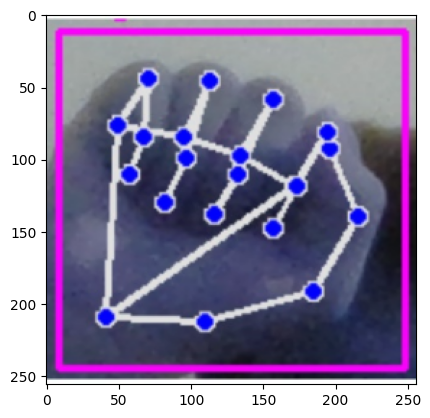

In [22]:
img=cv2.imread('B.jpg')
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [23]:
predicted_probabilities=model.predict(np.expand_dims(resize/255,0))
predicted_labels = np.argmax(predicted_probabilities, axis=1) 
print(predicted_labels)

1/1 [==============================] - 0s 37ms/step
[1]


In [5]:
import pyautogui

In [6]:
detector = HandDetector(detectionCon=0.8, maxHands=1)
offcet=25
imagesize=256

In [31]:
vid = cv2.VideoCapture(0)
while True:   
    ret, img = vid.read()
    hands, img = detector.findHands(img)
    if hands:
        hand=hands[0]
        x,y,w,h=hand["bbox"]
        try:
            whiteimg=np.ones((imagesize,imagesize,3),np.uint8)*255
            imageCrop=img[y-offcet:y+h+offcet,x-offcet:x+w+offcet]
            aspectratio=h/w;
#             whiteimg[0:imageCrop.shape[0],0:imageCrop.shape[1]]=imageCrop
#             cv2.imshow('whiteimg2', whiteimg)
            if aspectratio>1:
                k=imagesize/h
                wCal=math.ceil(k*w)
                resizeImg=cv2.resize(imageCrop,(wCal,imagesize))
                wGap=math.ceil((imagesize-wCal)/2)
                whiteimg[:,wGap:wGap+wCal]=resizeImg
 # predection
                predicted_probabilities=model.predict(np.expand_dims(whiteimg/255,0))
                predicted_labels = np.argmax(predicted_probabilities, axis=1) 
                print(predicted_labels[0])
                if(predicted_labels[0]==1):
                    pyautogui.keyDown("up")
                if(predicted_labels[0]==2):
                    pyautogui.keyDown("down")
 # display only hand image
                
 #  cv2.imshow('whiteImage', whiteimg)
            else:
                k=imagesize/w
                hCal=math.ceil(k*h)
                resizeImg=cv2.resize(imageCrop,(imagesize,hCal))
                resizeshape=resizeImg.shape;
                hGap=math.ceil((imagesize-hCal)/2)
                whiteimg[hGap:hGap+hCal,:]=resizeImg
#                 cv2.imshow('whiteImage', whiteimg)
                 # predection
                predicted_probabilities=model.predict(np.expand_dims(whiteimg/255,0))
                predicted_labels = np.argmax(predicted_probabilities, axis=1) 
                print(predicted_labels[0])
                if(predicted_labels[0]==1):
                    pyautogui.keyDown("up")
                if(predicted_labels[0]==2):
                    pyautogui.keyDown("down")

            
        except:
            print("error occured")

            
    cv2.imshow('frame', img)
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
#
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

1/1 [==============================] - 0s 57ms/step
0
1/1 [==============================] - 0s 60ms/step
0
1/1 [==============================] - 0s 54ms/step
0
1/1 [==============================] - 0s 55ms/step
0
1/1 [==============================] - 0s 57ms/step
0
1/1 [==============================] - 0s 54ms/step
0
1/1 [==============================] - 0s 53ms/step
0
1/1 [==============================] - 0s 58ms/step
0
1/1 [==============================] - 0s 52ms/step
0
1/1 [==============================] - 0s 55ms/step
0
1/1 [==============================] - 0s 55ms/step
0
1/1 [==============================] - 0s 53ms/step
0
1/1 [==============================] - 0s 55ms/step
1
1/1 [==============================] - 0s 65ms/step
1
1/1 [==============================] - 0s 54ms/step
0
1/1 [==============================] - 0s 55ms/step
0
1/1 [==============================] - 0s 54ms/step
1
1/1 [==============================] - 0s 56ms/step
0
1/1 [=======================